In [1]:
import numpy as np
import pandas as pd
from scipy import stats

In [2]:
df = pd.read_csv('problem,strategy.csv')
#df.rename(columns={'risk':'Gang_Embeddedness'}, inplace=True)
#df.head()

In [75]:
df = df[df['risk'].notna()]

In [76]:
len(df)

1541

In [77]:
intake = df[df['admin']==1]
retest = df[df['admin']==2]

In [78]:
intake['ID'].value_counts()

Southwest 1-15-269-1           4
Southwest 1-15-301-2           4
Southwest 1-15-316-2           4
Southwest 1-15-334-2           3
Southwest 1-15-348-3           3
                              ..
Devonshire-Topanga-11-195-1    1
Foothill-14-428-1              1
Foothill-14-516-1              1
Mission-19-20-2                1
Hollenbeck 3-20-133-2          1
Name: ID, Length: 794, dtype: int64

In [79]:
len(intake)

939

In [80]:
retest = retest.drop_duplicates(subset = ["ID"])
len(retest)

317

In [81]:
intake = intake.drop_duplicates(subset = ["ID"])
len(intake)

794

In [82]:
ids = retest['ID'].tolist()
unique_ids = []
for x in ids:
    if x not in unique_ids:
        unique_ids.append(x)
len(unique_ids)

317

In [83]:
intake = intake[intake['ID'].isin(unique_ids)]
len(intake)

282

In [84]:
ids = intake['ID'].tolist()
unique_ids = []
for x in ids:
    if x not in unique_ids:
        unique_ids.append(x)
len(unique_ids)

282

In [85]:
retest = retest[retest['ID'].isin(unique_ids)]
len(retest)

282

In [14]:
full = intake.append(retest)

In [15]:
len(full)

624

In [86]:
drop1 = intake[intake['risk'].isna()]['ID'].tolist()
drop2 = retest[retest['risk'].isna()]['ID'].tolist()
for x in drop2:
    drop1.append(x)

In [87]:
len(drop2)

0

In [88]:
intake = intake[~intake['ID'].isin(drop1)]
retest = retest[~retest['ID'].isin(drop1)]

In [89]:
len(retest)

282

In [90]:
len(intake)

282

In [21]:
full = intake.append(retest)

In [22]:
len(full)

624

In [23]:
stats.ttest_rel(intake['risk'], retest['risk'])

Ttest_relResult(statistic=8.095185971109368, pvalue=1.3048817586780185e-14)

In [24]:
intake['risk'].mean()

0.356256029246795

In [25]:
retest['risk'].mean()

-0.9984485071153849

In [26]:
intake.Strategy_Label.value_counts()

mentoring/support         195
anger manage/lifeskill     50
job/school readiness       36
developmental asset        20
employment counseling      11
Name: Strategy_Label, dtype: int64

In [27]:
len(retest)

312

In [28]:
intake['Strategy_Label'].value_counts()

mentoring/support         195
anger manage/lifeskill     50
job/school readiness       36
developmental asset        20
employment counseling      11
Name: Strategy_Label, dtype: int64

In [29]:
stats.ttest_rel(intake[intake['Strategy_Label']=='mentoring/support']['risk'], 
                retest[retest['Strategy_Label']=='mentoring/support']['risk'])

Ttest_relResult(statistic=6.605910644962769, pvalue=3.7074076888959163e-10)

In [30]:
stats.ttest_rel(intake[intake['Strategy_Label']=='developmental asset']['risk'], 
                retest[retest['Strategy_Label']=='developmental asset']['risk'])

Ttest_relResult(statistic=4.475643426092773, pvalue=0.0002591214879781102)

In [31]:
stats.ttest_rel(intake[intake['Strategy_Label']=='employment counseling']['risk'], 
                retest[retest['Strategy_Label']=='employment counseling']['risk'])

Ttest_relResult(statistic=0.7145816500020368, pvalue=0.4912118535524719)

In [32]:
stats.ttest_rel(intake[intake['Strategy_Label']=='job/school readiness']['risk'], 
                retest[retest['Strategy_Label']=='job/school readiness']['risk'])

Ttest_relResult(statistic=0.9898402694973436, pvalue=0.3290462753088871)

In [33]:
stats.ttest_rel(intake[intake['Strategy_Label']=='anger manage/lifeskill']['risk'], 
                retest[retest['Strategy_Label']=='anger manage/lifeskill']['risk'])

Ttest_relResult(statistic=4.944233240175776, pvalue=9.364323380795619e-06)

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [35]:
full['admin'] = full['admin'].map({1: 'intake', 2: 'retest'})

In [36]:
full.to_csv('prob_stra_intake_retest.csv', index=False)

In [37]:
full.loc[full['admin']=='intake','admin']='Intake'
full.loc[full['admin']=='retest','admin']='Retest'

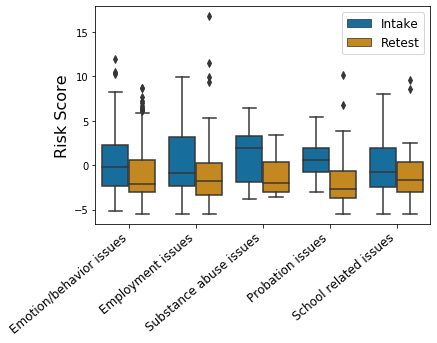

In [38]:
import matplotlib.pyplot as plt

ch=sns.boxplot(y='risk', x='Problem_Label', data=full, palette="colorblind",hue=full['admin'].values)
ch.set_xticklabels(ch.get_xticklabels(), rotation=40, horizontalalignment='right')

plt.xlabel('')
plt.ylabel('Risk Score', fontsize=16)
plt.xticks(fontsize=12)
plt.legend(fontsize=12)
plt.savefig('Problem_change.pdf',bbox_inches = 'tight')

In [39]:
intake.Problem_Label.value_counts()

Emotion/behavior issues    189
Employment issues           51
Probation issues            32
School related issues       28
Substance abuse issues      12
Name: Problem_Label, dtype: int64

In [40]:
stats.ttest_rel(intake[intake['Problem_Label']=='Interpersonal relationship issues']['risk'], 
                retest[retest['Problem_Label']=='Interpersonal relationship issues']['risk'])

(nan, nan)

In [41]:
#full['gang'] = full['gang'].fillna(0)
#full['family'] = full['family'].fillna(0)

In [42]:
intake[intake['Strategy_Label']=='get mentored for school/work']['risk'].mean()

nan

In [43]:
retest[retest['Strategy_Label']=='get mentored for school/work']['risk'].mean()

nan

In [44]:
stats.ttest_rel(intake[intake['Strategy_Label']=='substance abuse/anger management/life skill']['risk'], 
                retest[retest['Strategy_Label']=='substance abuse/anger management/life skill']['risk'])

(nan, nan)

In [45]:
intake[intake['Strategy_Label']=='substance abuse/anger management/life skill']['risk'].mean()

nan

In [46]:
retest[retest['Strategy_Label']=='substance abuse/anger management/life skill']['risk'].mean()

nan

In [47]:
stats.ttest_rel(intake[intake['Strategy_Label']=='developmental asset']['risk'], 
                retest[retest['Strategy_Label']=='developmental asset']['risk'])

Ttest_relResult(statistic=4.475643426092773, pvalue=0.0002591214879781102)

In [48]:
intake[intake['Strategy_Label']=='developmental asset']['risk'].mean()

-0.890939629

In [49]:
retest[retest['Strategy_Label']=='developmental asset']['risk'].mean()

-2.0770014115499995

In [50]:
stats.ttest_rel(intake[intake['Strategy_Label']=='job readiness']['risk'], 
                retest[retest['Strategy_Label']=='job readiness']['risk'])  

(nan, nan)

In [51]:
intake[intake['Strategy_Label']=='job readiness']['risk'].mean()

nan

In [52]:
retest[retest['Strategy_Label']=='job readiness']['risk'].mean()

nan

In [53]:
stats.ttest_rel(intake[intake['Problem_Label']=='Emotion/behavior issues']['risk'], 
                retest[retest['Problem_Label']=='Emotion/behavior issues']['risk'])

Ttest_relResult(statistic=7.0949272308251485, pvalue=2.5612085681456512e-11)

In [54]:
stats.ttest_rel(intake[intake['Problem_Label']=='Employment issues']['risk'], 
                retest[retest['Problem_Label']=='Employment issues']['risk'])

Ttest_relResult(statistic=1.5526905316691637, pvalue=0.12680448033692096)

In [55]:
stats.ttest_rel(intake[intake['Problem_Label']=='Probation issues']['risk'], 
                retest[retest['Problem_Label']=='Probation issues']['risk'])

Ttest_relResult(statistic=3.1694802965430173, pvalue=0.0034256040227272433)

In [56]:
stats.ttest_rel(intake[intake['Problem_Label']=='Substance abuse issues']['risk'], 
                retest[retest['Problem_Label']=='Substance abuse issues']['risk'])

Ttest_relResult(statistic=2.7496268410028675, pvalue=0.018903264068428)

In [57]:
stats.ttest_rel(intake[intake['Problem_Label']=='School related issues']['risk'], 
                retest[retest['Problem_Label']=='School related issues']['risk'])

Ttest_relResult(statistic=2.145557448890654, pvalue=0.041057856752814266)

In [58]:
intake[intake['Strategy_Label']=='couseling service (employment etc)']['risk'].mean()

nan

In [59]:
retest[retest['Strategy_Label']=='couseling service (employment etc)']['risk'].mean()

nan

In [60]:
emo=pd.read_csv('emotion.csv')
emo=emo.drop(columns={'Unnamed: 0'})
emo=emo.rename(columns={'GRYD_ETO_ID':'ID'})

In [61]:
emo

,ID,admin,age,sex,zone,gang,family,other,risk
0,BVCB-0-144-1,3,20.0,2,22.0,-7.812395,-3.665696,0.127677,-5.196776
1,BVCB-0-174-1,2,21.0,1,22.0,2.103629,-1.267477,2.417171,9.762419
2,Southeast 3-10-24-1,1,NaN,2,21.0,NaN,6.626468,-0.225167,-2.651080
3,Southeast 3-10-18-1,1,25.0,1,21.0,-8.583601,6.626468,-0.225167,-2.073084
4,Southeast 3-10-17-1,1,24.0,2,21.0,-8.583601,6.626468,1.413228,-1.421399
...,...,...,...,...,...,...,...,...,...
2760,Southwest 2-23-280-1,1,15.0,2,23.0,NaN,-1.823371,NaN,-2.667042
2761,Northeast-25-64-1,1,16.0,1,NaN,NaN,0.584661,NaN,-4.329781
2762,Mission-14-413-1,1,16.0,1,NaN,NaN,5.223674,NaN,2.635519
2763,77th 3-20-376-1,1,14.0,2,NaN,NaN,2.935746,NaN,-2.884790


In [62]:
full=pd.read_csv('text_w_emotion_labels (1).csv')

In [65]:
full

full=full.rename(columns={'GRYD_ETO_ID':'ID'})


In [68]:
df = pd.merge(left=emo.drop_duplicates(), right=full.drop_duplicates(), on='ID', how='inner')

In [73]:
df.head()

,ID,admin,age,sex,zone,gang,family,other,risk,S6b_Other_Activities,S11a_Comments,A1_Description,A2_Description,A3_Description,O1_other_group_name,Group_name_part1,PUSH_1,PULL_1,text_all,Emotion
0,BVCB-0-144-1,3,20.0,2,22.0,-7.812395,-3.665696,0.127677,-5.196776,"Working out, CBT, boxing","School. Poor grades, car accident, not enough ...",School,NaN,School,Other group,Group,Somebody got out of jail that brought a lot of...,School. work. moving,"BVCB-0-144-1,Working out, CBT, boxing,School. ...",fear
1,BVCB-0-174-1,2,21.0,1,22.0,2.103629,-1.267477,2.417171,9.762419,Basketball,Mother died,Basketball,NaN,NaN,No name,Money Gang,NaN,NaN,"BVCB-0-174-1,Basketball,Mother died,Basketball...",sadness
2,BVCB-0-174-1,1,20.0,1,22.0,2.931780,-0.597945,0.411312,NaN,Basketball,Mother died,Basketball,NaN,NaN,No name,Money Gang,NaN,NaN,"BVCB-0-174-1,Basketball,Mother died,Basketball...",sadness
3,Southeast 3-10-24-1,1,NaN,2,21.0,NaN,6.626468,-0.225167,-2.651080,Extra activities with children,Favor cousin was murder and never found his ki...,"Church, job and school",Church choir and praise team,NaN,Church group,No group,NaN,NaN,"Southeast 3-10-24-1,Extra activities with chil...",sadness
4,Southeast 3-10-18-1,1,25.0,1,21.0,-8.583601,6.626468,-0.225167,-2.073084,Actor/dance,Best friend brother was murder [sic] by 16 and...,"Church, school and job",Church choir and praise team,NaN,No name,No name,NaN,NaN,"Southeast 3-10-18-1,Actor/dance,Best friend br...",sadness


Text(0, 0.5, 'z_score')

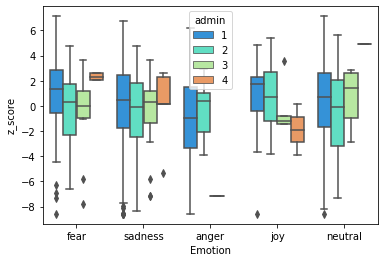

In [74]:
sns.boxplot(x='Emotion',y='gang',data=df,hue='admin',palette='rainbow')
plt.ylabel('z_score')

In [66]:
sns.boxplot(x='sentiment',y='risk',data=df,hue='admin',palette='rainbow')
plt.ylabel('risk')

ValueError: Could not interpret input 'sentiment'

In [ ]:
df

In [ ]:
intake = df[df['admin']==1]
retest = df[df['admin']==2]
len(intake)

In [98]:
intake.Emotion.value_counts()

sadness    141
fear        69
neutral     39
joy         23
anger       10
Name: Emotion, dtype: int64

In [ ]:
intake = intake.drop_duplicates(subset = ["ID"])
len(intake)

In [91]:
stats.ttest_rel(intake[intake['Emotion']=='sadness']['risk'], 
                retest[retest['Emotion']=='sadness']['risk'])

Ttest_relResult(statistic=4.822584330373707, pvalue=3.6503611270088307e-06)

In [92]:
stats.ttest_rel(intake[intake['Emotion']=='fear']['risk'], 
                retest[retest['Emotion']=='fear']['risk'])

Ttest_relResult(statistic=2.447375276418727, pvalue=0.0169781463553131)

In [93]:
stats.ttest_rel(intake[intake['Emotion']=='anger']['risk'], 
                retest[retest['Emotion']=='anger']['risk'])

Ttest_relResult(statistic=1.137720887104572, pvalue=0.28461779084738154)

In [94]:
stats.ttest_rel(intake[intake['Emotion']=='worry']['risk'], 
                retest[retest['Emotion']=='worry']['risk'])

(nan, nan)

In [95]:
stats.ttest_rel(intake[intake['Emotion']=='joy']['risk'], 
                retest[retest['Emotion']=='joy']['risk'])

Ttest_relResult(statistic=1.6309945076433459, pvalue=0.11712575379160531)

In [96]:
stats.ttest_rel(intake[intake['Emotion']=='neutral']['risk'], 
                retest[retest['Emotion']=='neutral']['risk'])

Ttest_relResult(statistic=2.182496210439165, pvalue=0.035322980647875764)